# D - Bildebehandling, diffusjon og Prims algoritme

__Tiltenkte studieprogramer:__ BIDATA

__Innleveringsfrist__: 3.mai kl. 12:00

__Innleveringsformat__: en pdf-fil


## Lasting og vise et bilde

Vi kommer til å tenke på et bilde som en numpy array $f$. Verdien i `f[i, j]` inneholder tre flytetall, en for hver av fargene Rød, Grønn og Blå. Dette er et svart hvitt bilde så vi bruker kun en av disse fargene. For å vise et bilde så bruker vi matplotlib.

Vi ser fra informasjonen om bildet at det er 500 x 375 piksler stort. Matrisen vi lager vil da ha samme størrelse.

Velg en av fargekanalene og legg dataene i en 375x500 nparray. 

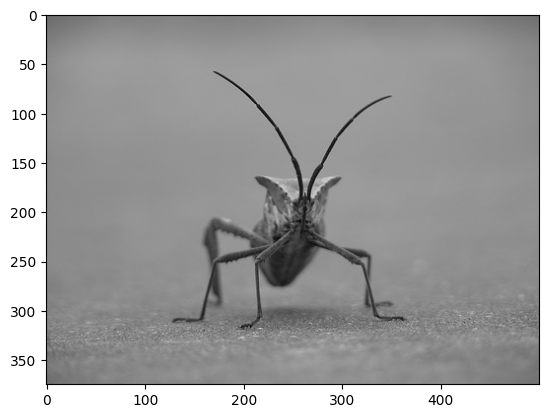

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


In [564]:
# Laster inn bildet image001.png
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

mg = mpimg.imread('/mnt/c/Users/name/Skule/2024-Vaar/IMAx2024D/MatteProsjekt/Prosjekter/image001.png')
plt.imshow(mg)
plt.show()
print(mg)


## 1. Gradienten og kantene i et bilde

Vi tenker på bildet som en numerisk tilnærming til en glatt funksjon $z=f(x,y)$. Vi skal regne ut en tilnærming til gradienten til denne funksjonen. Formelen vi bruker
er $$f_x(x,y) \approx \frac{f(x+\Delta x,y) - f(x-\Delta x,y)}{2\cdot \Delta x}$$ hvor $\Delta x = 1$, og tilsvarende for $f_y$.

Merk at vi bare kan regne ut $f_x$ for verdiene $x=1\dots 499$, siden vi bruker verdiene til siden for $x$ i utregningen.

## Oppgave 1

### a)

Regn ut verdiene for $f_x$ og legg dem i en matrise med navn `fx`. Matrisen `fx` har størrelse $500 \times 375$. Verdiene i `fx` skal være $0$ der de ikke er definert.

Tegn deretter bilde til matrisen `fx`.

### b)

Regn ut verdiene for $f_y$ og legg dem i en matrise med navn `fy`. Matrisen `fy` har størrelse $500 \times 375$. Verdiene i `fy` skal være $0$ der de ikke er definert. 

Tegn deretter bilde til matrisen `fy`.

### c) 

Regn ut lengden til gradienten, det vil si $|\nabla f|$, i hvert punkt og legg dem i en matrise med navn `fgradabs`. Matrisen har størrelse $500\times 375$.
Verdiene skal være $0$ der de ikke er definert.

Tegn bildet som tilhører matrisen `fgradabs`.

### d)

Finn minste og største verdi i matrisen `fgradabs`. Skaler deretter verdiene slik at de ligger mellom $0$ og $1$ og legg resultatet i en matrise med samme navn. Tegn `fgradabs` bildet på nytt. Dere skal ha samme bilde som i c).

### e)

Les igjennom https://en.wikipedia.org/wiki/Edge_detection. 

Forklar, med egne ord, hva vi mener når vi snakker om kanter i et bilde. Forklar hvordan gradienten vi har regnet ut kan brukes til å finne kantene i et bilde.

Det er lett å se med det blotte øye hva kantene bør være i akkurat dette bildet (hint: rundt insektet). Vi skal nå prøve ut noen algoritmer som finner disse kantene.

### f)

Les gjennom https://www.w3schools.com/python/numpy/numpy_ufunc_create_function.asp. Dere bør være i stand til å lage din egen `ufunc` etter å ha lest dette. Dere skal også lære dere å bruke `np.vectorize`. Se https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

La $c$ være et tall mellom $0$ og $1$. Lag en matrise med navn "kanter" som har verdier $0$ hvis verdien på samme plass i `fgradabs` er mindre enn eller lik $c$, og verdier $1$ hvis verdien i `fgradabs` er større enn $c$. Dvs. anvend funksjonen

```
def kutt(x):
    c = 0.5 # du kan prøve å endre på denne verdien
    if x <= c: return 0.0 else: return 1.0
```

på alle elementene `fgradabs`. Gjør dette ved å lage en numpy `ufunc`.


### g) 

I oppgave f) lærte du en algoritme for å finne kantene i et bilde. Prøv å finn en passende verdi for $c$ slik at problemet beskrevet i e) 
blir løst på en rimelig god måte. Hvordan synes dere algoritmen fungerer på akkurat dette bildet?

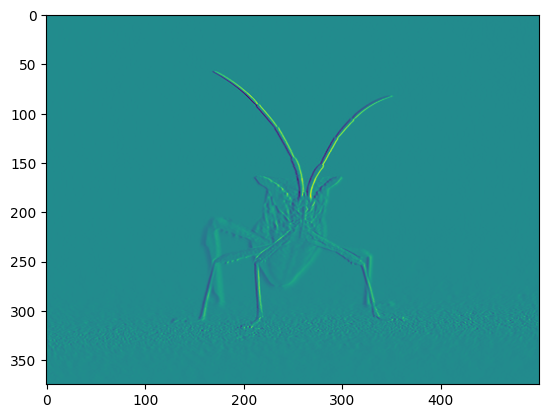

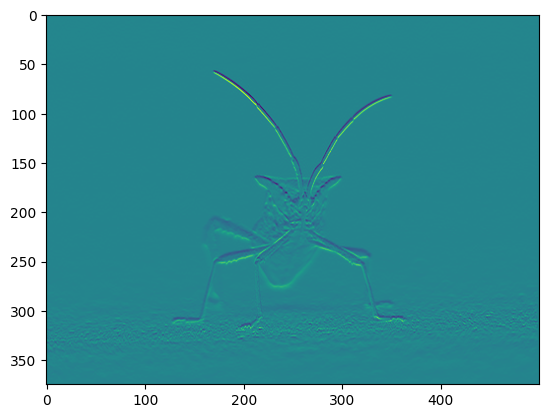

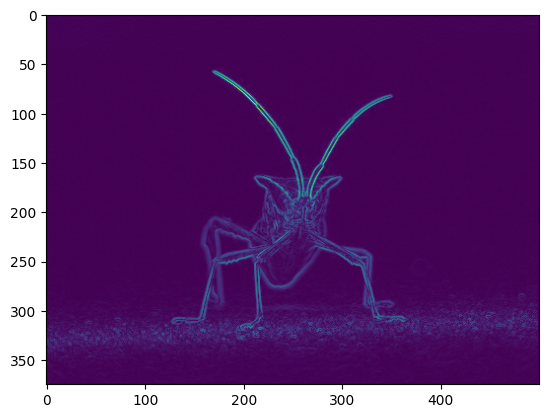

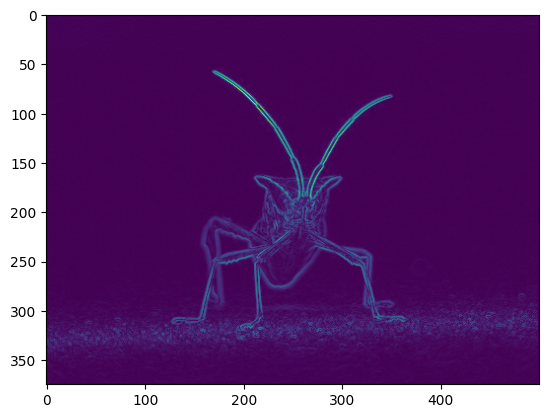

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.4 0.4 ... 0.4 0.4 0.4]
 [0.  0.4 0.4 ... 0.4 0.4 0.4]
 ...
 [0.  0.4 0.4 ... 0.6 0.6 0.6]
 [0.  0.4 0.4 ... 0.6 0.4 0.4]
 [0.  0.6 0.6 ... 0.4 0.4 0.4]]


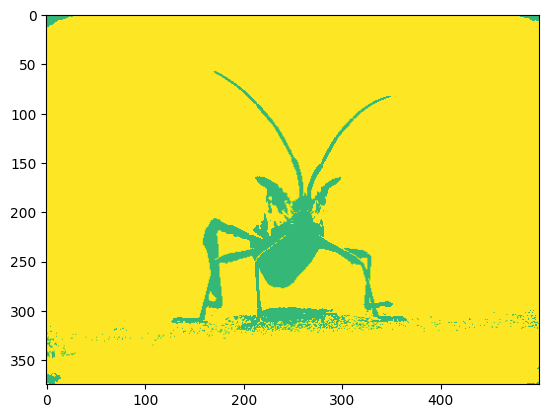

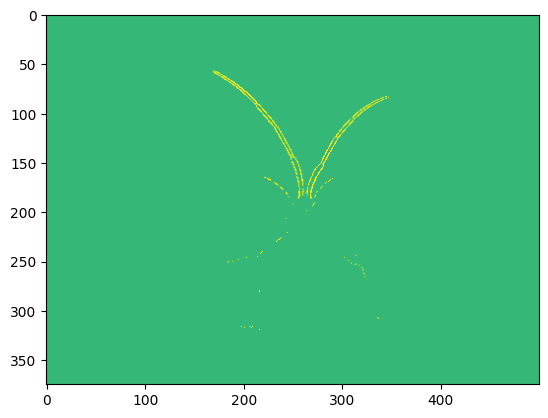

In [565]:
# Oppgave 1
#Defining variables and constants
Sx = 500
Sy = 375
fx = np.zeros((Sy,Sx))
fy = np.zeros((Sy,Sx))
fgradabs = np.zeros((Sy,Sx))
kant = np.zeros((Sy,Sx))
image = mg[:,:,-1]

#Defining a arbitrary smooth functions
def f(x,y):
    return image[y,x]
#Task A/B
#Partial derivative numerical function on x
def f_x(x,y, Dx):

    return (f(x + Dx, y) -  f(x-Dx, y)) /2*Dx
#Partial derivative numerical function on y
def f_y(x,y,Dy):
    return (f(x , y + Dy) -  f(x, y-Dy)) /2*Dy

for i in range(1,Sy-1):
    for j in range(1,Sx-1):
       fx[i,j]= f_x(j,i,1)
       fy[i,j] = f_y(j, i, 1)
plt.imshow(fx)
plt.show()
plt.imshow(fy)
plt.show()
#Task C
#Finding the lenght of the gradient.
def nablaf_x(a,b):
     return np.sqrt(a**2 + b**2)

for k in range(1, Sy-1):
    for h in range(1, Sx-1):
        fgradabs[k,h] = nablaf_x(fx[k,h], fy[k,h])

plt.imshow(fgradabs)
plt.show()

#Task D
#Proving that the scaled fgradabs is the same as the original.
normValue = np.max(fgradabs)
for k in range(1, Sy):
    for h in range(1, Sx):
        fgradabs[k,h] = fgradabs[k,h]/(normValue)
plt.imshow(fgradabs)
plt.show()

#Task F
def kutt(x):
    c = 0.45 # du kan prøve å endre på denne verdien
    value = 0.6
    if x <= c: value = 0.4
    return value

#This block of code proves we know what ufuncs are and how to implement them but python is throwing Typerrors when showing the image.
""" 
kutt = np.frompyfunc(kutt, 1 ,1)
kant = kutt([fgradabs])
temp = kant.astype(np.float64)
kant = temp[-1,:,:]
"""
#Task F/G
image = mg[:,:,-1] #mg has 3
difImg = image
for k in range(1, Sy):
    for h in range(1, Sx):
        kant[k,h] = kutt(image[k,h])
        fgradabs[k,h] = kutt(fgradabs[k,h])

print(kant)
plt.imshow(kant)
plt.show()
plt.imshow(fgradabs)
plt.show()


## 2. Diffusjon og endringer i tid

Vi kommer til å se at gradient-metoden kan forbedres ved å bruke en diffusjon på bildet til å glatte ut og fjerne støy i bildet. Vi skal regne ut en sekvens av bilder $F(x,y,t)$ for 
stigende verdier av $t$. 

Ficks lover (https://no.wikipedia.org/wiki/Ficks_diffusjonslover) forklarer diffusjon som en bevaringslov med en spesielle type fluks.

En bevaringslov i en dimensjon tar formen

$$
\frac{\partial F}{\partial t} + \frac{\partial J}{\partial x} = 0,
$$

hvor $J(F,x,t)$ er fluks av stoffet $F$. Formen til $J$ bestemmes ut fra en fysisk modell. Noen viktiger eksempler:

1. $J = aF$ hvor $a$ er en konstant.
2. $J = aF^2$.
3. $J = -a\frac{\partial F}{\partial x}$

I flere situasjoner har vi til og med en kombinasjon av alle 3, dvs

$$
J = a_1 F + a_2 F^2 + a_3\frac{\partial F}{\partial x}
$$

## Oppgave 2: 

### a)
Ficks først diffusjonslov sier at $J$ tar en av formene over. Hvilken?

### b)
Ficks andre diffusjonslov gir ligningen som følger fra $J$ og bevaringsloven. Hva blir den?

### c)
Hva representerer isåfall flukser av type 1 og 2? Oppgi situasjoner vår de ville vært passende.

### d)
Hva med den siste muligheten, dvs en summen av alle tre? Når gjelder den? Tror du at systemet vil oppføre seg mest som 1, 2 eller 3? Eller kommer det an på andre faktorer? 

### e)
Forklar hvorfor en bevaringslov for et stoff $F(x,y,t)$ med 2 dimensjoner tar formen

$$
\frac{\partial F}{\partial t} + \frac{\partial I}{\partial x} + \frac{\partial J}{\partial y}= 0,
$$

hvor fluksen $\vec{J} = (I, J)$ oppgis i henholdsvis $x$- og $y$-retningene.

In [566]:
# Oppgave 2
""""
a,
Første diffusjonslov er 3 som er vist over

b, 
For å få Ficks andre diffusjonslov bruker vi bevaringsloven og substituerer J med den tredje fysiske modellen for J som er vist ovenfor.

c, 
Flukser av type 1 representerer en lineær tilnærming for stoffet F. Og flukser av type 2 representererer en ikke lineær eller kvadratisk 
tilnærming for stoffet F.

d, Summen av alle 3 gjelder i et komplekst system hvor det er variabel fluks, lineær flux og ikke lineær flux. Dette fører til at 
den andre fysiske modellen representerer oppførselen til systemet hvis F er større enn 0. Dersom F er mindre enn 1 vil oppførselen
til systemet bli best repressentert som enten den første eller tredje fysiske modellen.

e, Bevaringsloven sier dF/dt + dJ/dx = 0. Dersom vi tar hensyn til to dimensjoner vil J bli byttet ut med vektoren J^(->) = (I,J) og dx vil ta hensyn til x og y
Dermed får vi dF/dt + dI/dx + dJ/dy = 0.
"""

'"\na,\nFørste diffusjonslov er 3 som er vist over\n\nb, \nFor å få Ficks andre diffusjonslov bruker vi bevaringsloven og substituerer J med den tredje fysiske modellen for J som er vist ovenfor.\n\nc, \nFlukser av type 1 representerer en lineær tilnærming for stoffet F. Og flukser av type 2 representererer en ikke lineær eller kvadratisk \ntilnærming for stoffet F.\n\nd, Summen av alle 3 gjelder i et komplekst system hvor det er variabel fluks, lineær flux og ikke lineær flux. Dette fører til at \nden andre fysiske modellen representerer oppførselen til systemet hvis F er større enn 0. Dersom F er mindre enn 1 vil oppførselen\ntil systemet bli best repressentert som enten den første eller tredje fysiske modellen.\n\ne, Bevaringsloven sier dF/dt + dJ/dx = 0. Dersom vi tar hensyn til to dimensjoner vil J bli byttet ut med vektoren J^(->) = (I,J) og dx vil ta hensyn til x og y\nDermed får vi dF/dt + dI/dx + dJ/dy = 0.\n'

## 3. Diffusjon på bilde

Vi lar endringen av gråfargen med hensyn på $t$ være gitt ved 

$$
F_t = I_x + J_y,
$$

hvor $I = g\cdot F_x$ og $J=g\cdot F_y$, og $g$ er konstanten $1$ i denne
oppgaven.

Vi får altså 

$$F_{t} = g \cdot \Delta F$$ 
hvor $$\Delta F = F_{xx} + F_{yy}.$$ 

Vi skal starte med bildet over, slik at vi har initialverdibetingelsen $$F(x,y,0)=f(x,y).$$

Vi ønsker ikke at fargen skal gå ut eller komme inn i bildet, slik at vi trenger betingelsen $F_x = 0$ for venstre og høyre kant i bildet, og $F_y=0$ for
øvre og nedre kant i bildet. Merk at utregningen av de partiellderiverte i forrige oppgave tilfredstiller disse to betingelsene.

Vi bruker forlengs Euler for integrasjonen. Ved steg $t$ så har vi 

$$\frac{F(x,y,t+\Delta t) - F(x,y,t)}{\Delta t} \approx F_{xx}(x,y,t) + F_{yy}(x,y,t),$$

det vil si vi får oppdateringen 

$$F(x,y,t+\Delta t) = F(x,y,t) + \Delta t \cdot (F_ {xx}(x,y,t) + F_{yy}(x,y,t))$$

som vi gjennomfører et gitt antall ganger.

Faktoren $\Delta F = F_{xx} + F_{yy}$ må tilnærmes numerisk. Vi bruker 

$$F_{xx}(x,y,t) \approx \frac{F_x(x+\Delta x,y,t) - F_x(x-\Delta x,y,t)}{2\Delta x}$$
og tilsvarende for $F_{yy}$.

Vi må ha steg $\Delta t$ som er små nok. Dere kan eksperimentere med ulike verdier, hvor dere starter med $\Delta t = 0.5$. 

## Oppgave 3

### a) 

Implementer integrasjonen beskrevet over og vis bildene som lages.

### b) 

Eksperimenter med ulike antall oppdateringer og ulike verdier for $\Delta t$ i a). Beskriv hva du observerer.

### c)

Gjennomfør analysen fra Oppgave 1 for bildet som blir generert fra a). Prøv å finn en god kombinasjon av verdier for $c$, $\Delta t$ og antall oppdateringer slik at 
algoritmen fra Oppgave 1 kombinert med det diffuserte bilde gir en rimelig god beskrivelse av kantene i bildet. 


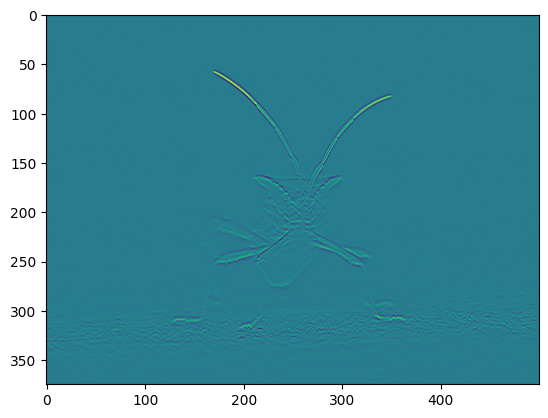

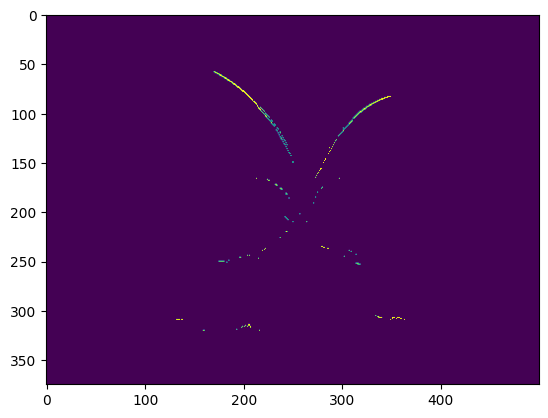

In [567]:
# Oppgave 3
Dx = 1
Dy = 1
Dt=0.5
t_max = 3
diffusjon = np.zeros((Sy,Sx))
Fxx = diffusjon
Fyy = Fxx
kant2 = diffusjon

def F(x,y,t):
  return f(x,y)

#Partial derivative numerical function on x
def F_x( x, y, t):
    return (F(x + Dx, y, t) -  F(x-Dx, y, t)) /2*Dx
#Partial derivative numerical function on y
def F_y( x, y, t):
    return (F(x , y + Dy,t) -  F(x, y-Dy,t)) /2*Dy
# Second order partial derivative on xx
def F_xx(x,y,t):
    return (F_x(x+ Dx ,y,t) - F_x(x- Dx, y,t))/2*Dx  
# Second order partial derivative on yy
def F_yy(x,y,t):
    return (F_y(x ,y+ Dy,t) - F_y(x, y- Dy,t))/2*Dy  

def F_t(x,y,t):
    return F(x,y,t) + Dt * (F_xx(x,y,t) + F_yy(x,y,t))

for t in range(0, t_max):
    for i in range(Sy-2):
        for j in range(Sx-2):
            Fxx[i,j] = F_xx(j,i,0)
            Fyy[i,j] = F_yy(j,i,0)
    diffusjon = diffusjon + Dt * (Fxx + Fyy)
plt.imshow(diffusjon)
plt.show()

for i in range(Sy):
    for j in range(Sx):
        diffusjon[i,j] = kutt(diffusjon[i,j])


plt.imshow(diffusjon)
plt.show()

## 4. Mer diffusjon på et bilde 

Vi skal igjen prøve å glatte ut bildet med diffusjon med differensiallikningen 

$$
F_t = I_x + J_y,
$$

hvor $I = g\cdot F_x$, og $J=g\cdot F_y$, men denne gangen er $g$ funksjonen $$g(|\nabla F|)= \frac{1}{\sqrt{1 + \frac{|\nabla F|^2}{\lambda ^2}}}$$ for et tall $\lambda$. Merk at hvis $g$ er en konstant så har vi samme differensiallikning som i forrige oppgave. 

Ideen er at å velge en passende verdi for $\lambda$ vil gi en diffusjon hvor de skarpe kantene blir bevart lengre i diffusjonen. 

## Oppgave 4

### a) 

Tegn grafen til $g(x)$ for ulike verdier av $\lambda$. 

#### i) 

Hva vil $g(|\nabla F|)$ gjøre med store verdier av $|\nabla F|$? 

#### ii) 

Hva vil $g(|\nabla F|)$ gjøre med små verdier av $|\nabla F|$? 

#### iii) 

Hvilken innflytelse har $\lambda$ for hva som skjer i) og ii)?

### b) 

Implementer integrasjonen beskrevet over og vis bildene som lages.

### c) 

Eksperimenter med ulike antall oppdateringer og ulike verdier for $\Delta t$  og $\lambda$ i b). Beskriv hva du observerer.

Hvilken innflytelse har ulike verdier for $\lambda$ på resultatene?

### d)

Gjennomfør analysen fra Oppgave 1 for bildet som blir generert fra b). Prøv å finn en god kombinasjon av verdier for $c$, $\lambda$, $\Delta t$ og antall oppdateringer slik at vi får en god beskrivelse av kantene i bildet. 


In [568]:
# Oppgave 4
